In [6]:
#Shishir Khanal
#July 4, 2025
#Forecasting Models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Forecasting Procedure
#Choose Model
#Split data into train/test
#Fit on Training Set
#Evaluate on test set
#Re-fit on entire data set
# forecast for future

In [8]:
#Metrics for regression
#Mean Absolute Error -> Doesn't alert if the errors are large but few points or small error over time
#Mean Squared Error -> Punish model for having large error, also no worries about the sign of error ; but units are squared so interpretation is hard
#Root Mean Squared Error -> Advantages of MSE but unit is interpretable

In [9]:
#How to interpret errors?
# Compare the error to avg value of your test set 
#If its small, the model is good
#If the error is large model is bad

In [16]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.index.freq = 'MS'

In [17]:
train_data = airline.iloc[:109] # Goes up to but not including 109
test_data = airline.iloc[108:]

In [18]:
#Fit model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [19]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

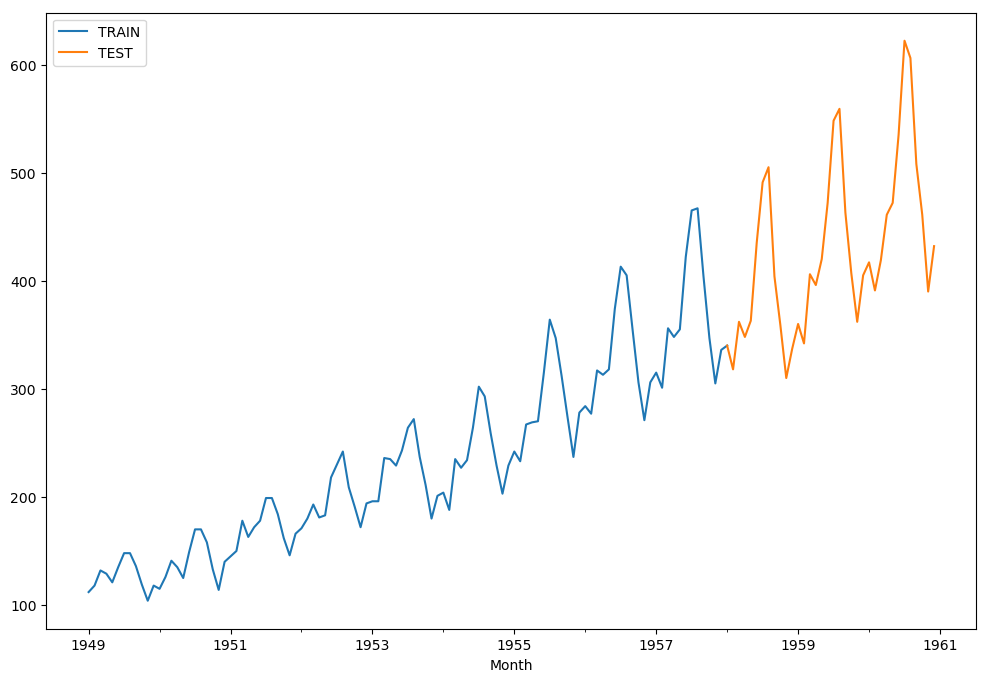

In [20]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

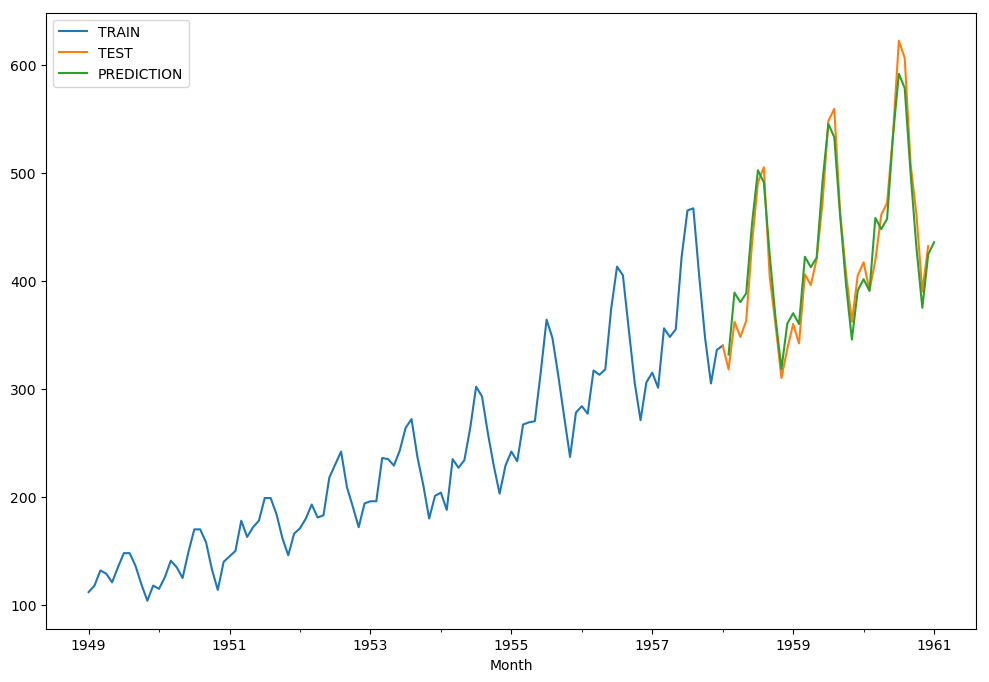

In [21]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')

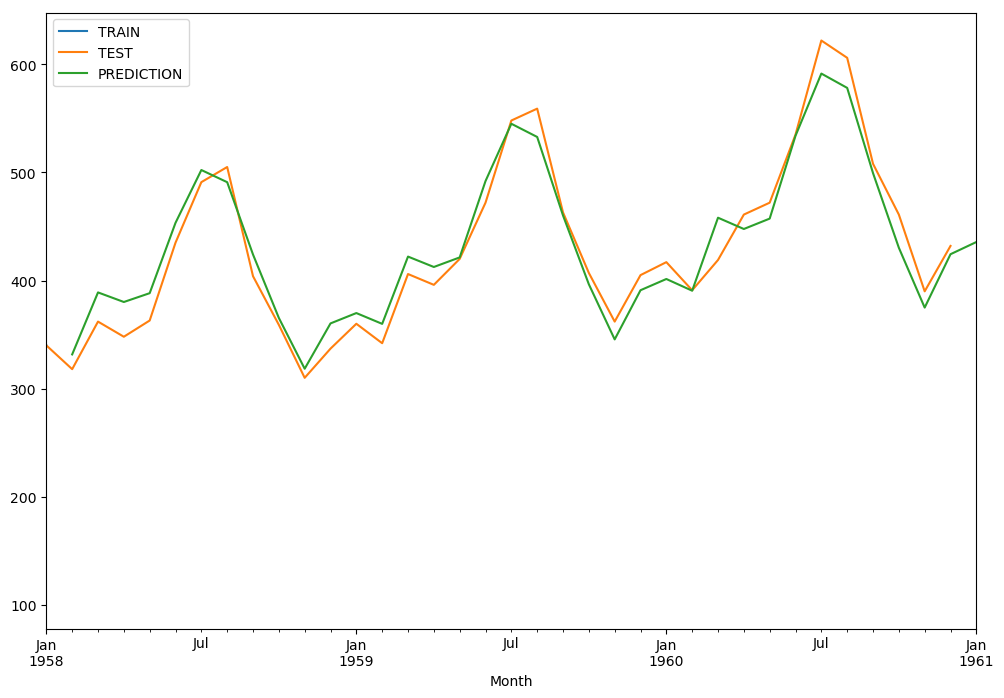

In [22]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [24]:
mean_absolute_error(test_data, test_predictions)

46.301385222795716

In [25]:
mean_squared_error(test_data, test_predictions)

3074.817168986143

In [26]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [28]:
#RMSE
np.sqrt(mean_squared_error(test_data, test_predictions))
#RMSE < Std Dev indicates model is performing well

55.45103397580736

In [29]:
final_model = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [30]:
forecast_predictions = final_model.forecast(36)

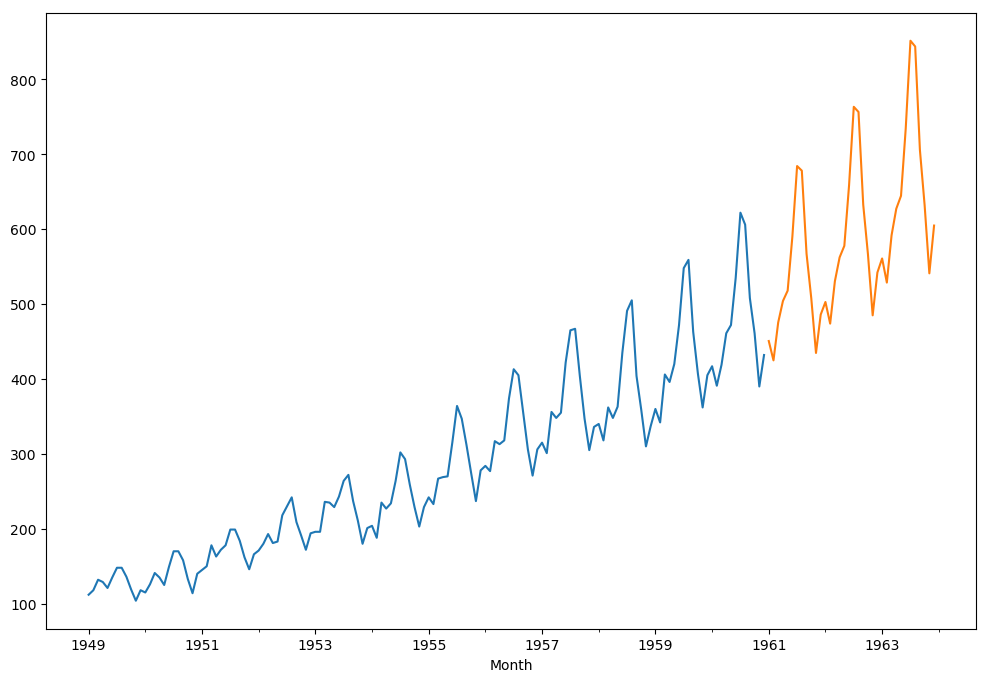

In [31]:
airline['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [34]:
#Stationary data doesn't exhibit trend or seasonality
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


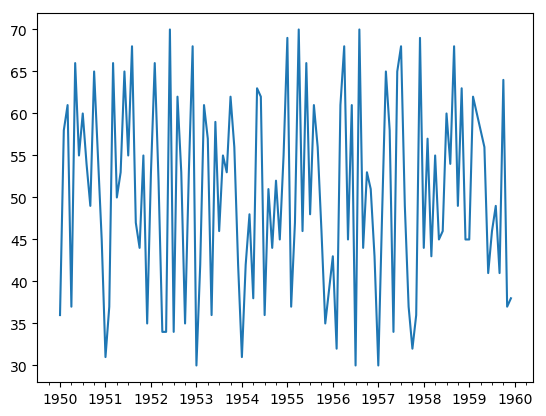

In [36]:
#Stationary Data
df2['a'].plot()

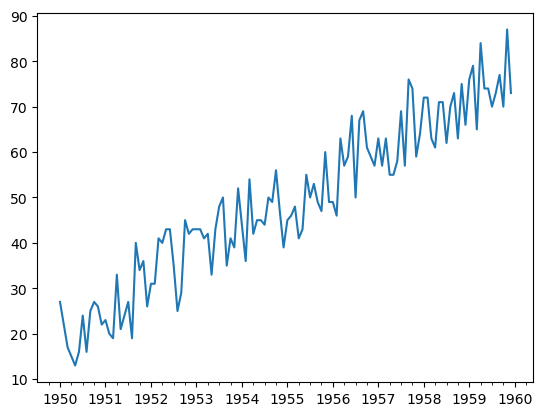

In [37]:
#Non Stationary Data
df2['b'].plot()

In [38]:
from statsmodels.tsa.statespace.tools import diff

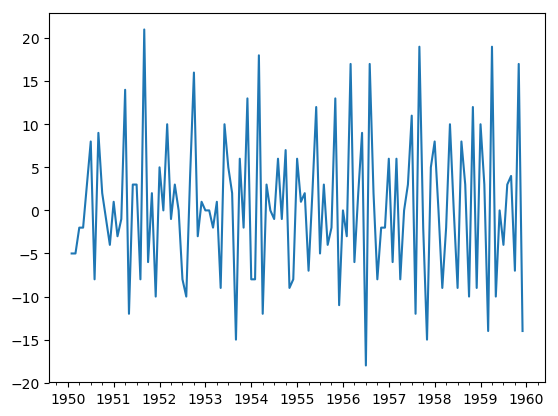

In [44]:
#df2['b'] - df2['b'].shift(1)
#Differencing makes a non stationary model stationary
diff(df2['b'],k_diff=1).plot()